# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
from agents import Households
from agents import Government

adapted_counts_per_run = []
for run in range(50):   
    # Initialize the Adaptation Model with 50 household agents.
    model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

    # Calculate positions of nodes for the network plot.
    # The spring_layout function positions nodes using a force-directed algorithm,
    # which helps visualize the structure of the social network.
    pos = nx.spring_layout(model.G)

    # # Define a function to plot agents on the network.
    # # This function takes a matplotlib axes object and the model as inputs
    '''''
    def plot_network(ax, model):
            # Clear the current axes.
            ax.clear()
            # Determine the color of each node (agent) based on their adaptation status.
            colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents if isinstance(agent, Households)]
            # Draw the network with node colors and labels.
            nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
            # Set the title of the plot with the current step number.
            ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

    # Generate the initial plots at step 0.
    # Plot the spatial distribution of agents. This is a function written in the model.py
    model.plot_model_domain_with_agents()

    # Plot the initial state of the social network.
    fig, ax = plt.subplots(figsize=(7, 7))
    plot_network(ax, model)
    plt.show()
    '''

#government_agent = Government(unique_id="gov_1", model=model)
#model.schedule.add(government_agent)
#government_agent.support_non_adapted_households()

# Run the model for 20 steps and generate plots every 5 steps.
    for step in range(20):
        model.step()
        # Assuming 'model' is your AdaptationModel instance

        # Every 5 steps, generate and display plots for both the spatial distribution and network.
        # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    '''''
        if (step + 1) % 5 == 0:
            # Plot for the spatial map showing agent locations and adaptation status.
            plt.figure(figsize=(10, 6))
            model.plot_model_domain_with_agents()

            # Plot for the social network showing connections and adaptation statuses.
            fig, ax = plt.subplots(figsize=(7, 7))
            plot_network(ax, model)
            plt.show()
    '''
    adapted_count = sum(1 for agent in model.schedule.agents if isinstance(agent, Households) and agent.is_adapted)
    adapted_counts_per_run.append(adapted_count)
    print ("adaptedperrun: {adapted_counts_per_run}")
    for measure, count in model.flood_measure_count.items():
        print(f"{measure}: {count} times purchased")
for measure, count in model.flood_measure_count.items():
        print(f"{measure}: {count} times purchased")


# Initialize a list to store the count of adapted households at each step
#adapted_counts = []

# Run the model and collect data
#for step in range(20):
   # model.step()
   # adapted_count = sum(1 for agent in model.schedule.agents if isinstance(agent, Households) and agent.is_adapted)
   # adapted_counts.append(adapted_count)

    # Display network plots at specified intervals
    #if (step +1) % 5 == 0:
     #   fig, ax = plt.subplots(figsize=(7, 7))
     #   plot_network(ax, model)
     #   plt.show()

# Plot the line graph of adapted households over time
##plt.figure(figsize=(10, 6))
#plt.plot(range(20), adapted_counts, marker='o', linestyle='-', color='blue')
#plt.title('Number of Adapted Households Over Time')
###plt.xlabel('Simulation Step')
#plt.ylabel('Adapted Households Count')
#plt.grid(True)
#plt.show()







/Users/tanneheemsbergen/Documents/GitHub/ABM-course/base_model_mesa/model/agents.py:252: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if self.model.schedule.steps % 4 == 0 and self.model.schedule.steps is not 0:


Total combined wealth for Household 39: 36297.49816940459
Collaborated Households: 0
Budget: 5990.001656294143
before: 0.5610572322664947
None
Total combined wealth for Household 47: 58093.197860549306
Collaborated Households: 0
Budget: 9299.896413836852
before: 0.8233609203962999
None
Total combined wealth for Household 37: 34677.7088984455
Collaborated Households: 0
Budget: 1993.1226094961112
before: 0.7358183591105979
None
Total combined wealth for Household 17: 36335.86958296391
Collaborated Households: 0
Budget: 1532.63801640283
before: 0.5735697167733388
None
Total combined wealth for Household 11: 41818.89008973561
Collaborated Households: 0
Budget: 6704.422148788111
before: 0.3572308480991406
None
Total combined wealth for Household 45: 28627.163240383365
Collaborated Households: 0
Budget: 5894.2442161163335
before: 1
None
Total combined wealth for Household 48: 32656.637472209866
Collaborated Households: 0
Budget: 9616.261462298124
before: 0.6924898966306411
None
Total combine

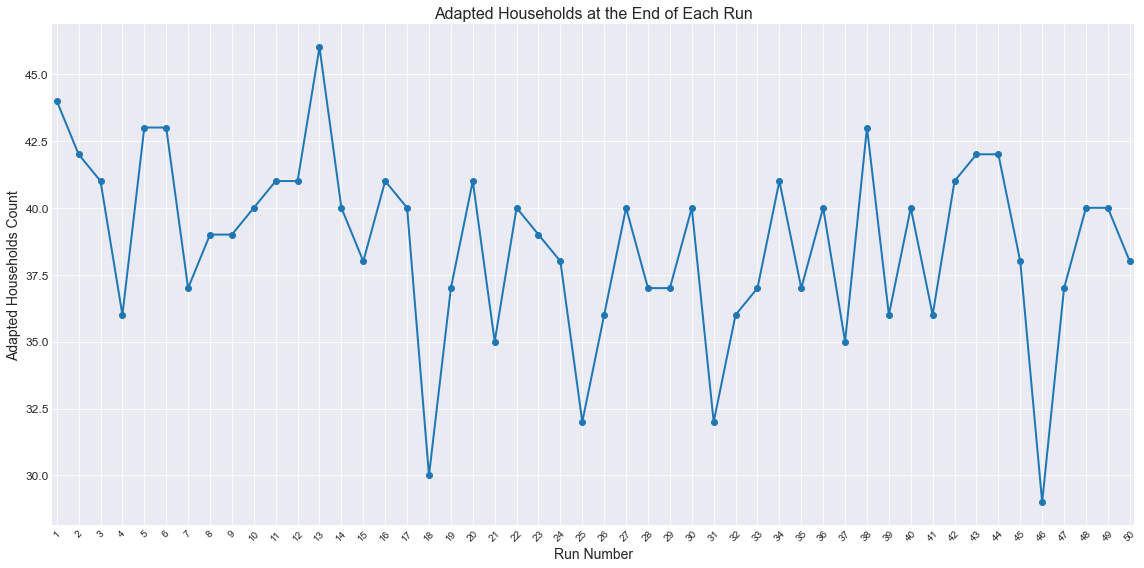

38.66


In [15]:
plt.style.use('seaborn-darkgrid')  

plt.figure(figsize=(16, 8))  # Increase figure size
plt.plot(range(1, 51), adapted_counts_per_run, marker='o', linestyle='-', linewidth=2, markersize=6)  # Adjust line and marker
plt.title('Adapted Households at the End of Each Run', fontsize=16)
plt.xlabel('Run Number', fontsize=14)
plt.ylabel('Adapted Households Count', fontsize=14)
plt.grid(True)
plt.xticks(range(1, 51), rotation=45)  # Rotate x-axis ticks for better readability
plt.yticks(fontsize=12)  # Adjust y-axis tick font size
plt.xlim(0.8, 50.2)
plt.tight_layout()  # Adjust the padding of the figure
plt.show()
print(sum(adapted_counts_per_run)/50)

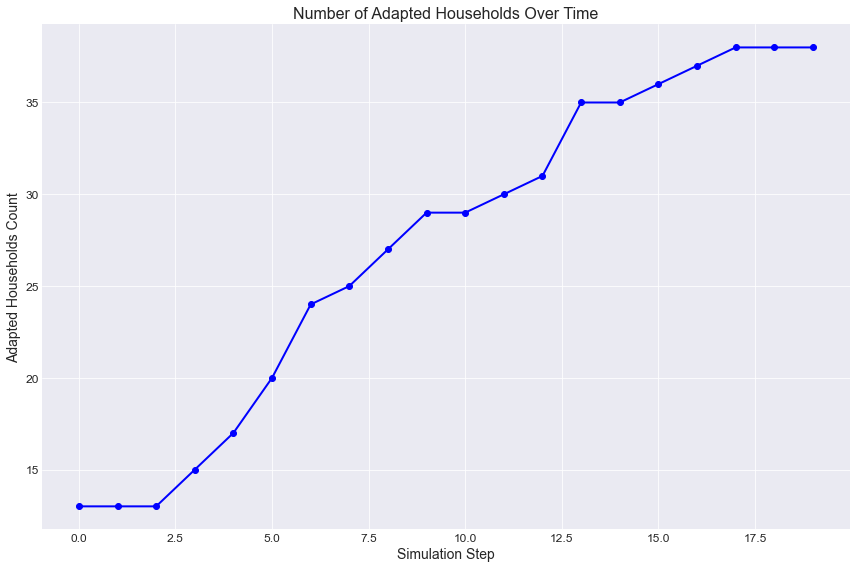

In [16]:
agent_data = model.datacollector.get_model_vars_dataframe()
agent_data
# Plotting the line graph
plt.style.use('seaborn-darkgrid')  # Apply a style template for a nicer background grid

plt.figure(figsize=(12, 8))  # Increase figure size for better readability
plt.plot(agent_data.index, agent_data["total_adapted_households"], marker='o', linestyle='-', linewidth=2, markersize=6, color='blue')
plt.title('Number of Adapted Households Over Time', fontsize=16)
plt.xlabel('Simulation Step', fontsize=14)
plt.ylabel('Adapted Households Count', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust the padding of the figure
plt.show()


In [4]:
model_data = model.datacollector.get_agent_vars_dataframe()
model_data

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
1    0                   0.000000              0.000000          0.000000   
     1                   0.556364              0.545926          0.000000   
     2                   0.720119              0.590972          0.000000   
     3                   0.000000              0.000000          0.000000   
     4                   0.000000              0.000000          0.000000   
...                           ...                   ...               ...   
20   46                  0.000000              0.000000          0.000000   
     47                  0.226830              0.089271          0.195175   
     48                  2.188000              0.485010          1.692367   
     49                  1.444515              0.712513          1.580258   
     gov_1                    NaN                   NaN               NaN   

              FloodDamageActual IsAdapted  FriendsCount  \
Step AgentID                                              
1    0                 0.000000      True           3.0   
     1                 0.000000     False           4.0   
     2                 0.000000     False           5.0   
     3                 0.000000      True           4.0   
     4                 0.000000      True           4.0   
...                         ...       ...           ...   
20   46                0.000000      True           4.0   
     47                0.363029      True           3.0   
     48                0.740162      True           6.0   
     49                0.728195     False           4.0   
     gov_1                  NaN      None           NaN   

                                                   location        wealth  \
Step AgentID                                                                
1    0         POINT (270646.17979046766 3329323.618960157)   6681.299601   
     1         POINT (272068.87362551724 3300010.475020225)   7033.475317   
     2        POINT (222042.67830923086 3312048.4128144584)   7278.366311   
     3         POINT (251995.8453512448 3337329.0201981743)   2760.192013   
     4          POINT (220763.6720532859 3327043.385410622)   4455.183251   
...                                                     ...           ...   
20   46         POINT (226738.080584673 3319610.7629995607)   8188.585791   
     47         POINT (221655.67886277373 3305008.36799894)  30675.212044   
     48       POINT (225207.19927971065 3297460.6856492586)  65506.739929   
     49         POINT (277438.0217810678 3305194.106413489)  14715.073025   
     gov_1                                             None           NaN   

                           selected_measure reduction_factors household_info  
Step AgentID                                                                  
1    0                                 None              None           None  
     1                                 None              None           None  
     2                                 None              None           None  
     3                                 None              None           None  
     4                                 None              None           None  
...                                     ...               ...            ...  
20   46                                None              None           None  
     47       Relocating electrical systems              None           None  
     48       Relocating electrical systems              None           None  
     49                                None              None           None  
     gov_1                             None              None           None  

[1020 rows x 11 columns]